In [2]:
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import numpy as np
from numpy import NaN

from scipy.signal import find_peaks

import matplotlib
from pylab import rcParams
#%matplotlib widget, camera ready submission problem
matplotlib.rc('pdf', fonttype=42)
matplotlib.rcParams['savefig.dpi'] = 300
rcParams.update({'figure.autolayout': True})

def readfile(filename):
    types = {'frequency': float,'power': float}
    df = pd.read_csv(filename, skiprows=0, header=None, error_bad_lines=False, delim_whitespace=False, delimiter=' ')
    df.columns = ['frequency', 'power']
    df.dropna(inplace=True)
    #print(df.describe())
    return df

# Static

In [3]:
BER = pd.DataFrame(columns=["Free Running", "Tx Gain 10", "Tx Gain 20", "Tx Gain 30", "Tx Gain 40", "Tx Gain 50", "Tx Gain 60", "Tx Gain 70", "Tx Gain 80", "Tx Gain 90"])

BER.iloc[:, 0] = [round(i, 6) for i in [0.001334051724137931, 0.0011314655172413794, 0.0029461206896551724]]
BER.iloc[:, 1] = [round(i, 6) for i in [0.0014935344827586208, 0.0008943965517241379, 0.001271551724137931]]
BER.iloc[:, 2] = [round(i, 6) for i in [0.0007198275862068965, 0.0005646551724137932, 0.0010732758620689655]]
BER.iloc[:, 3] = [round(i, 6) for i in [0.03753879310344828, 0.002144396551724138, 0.0007349137931034483]]
BER.iloc[:, 4] = [round(i, 6) for i in [0.0009008620689655172, 0.0006637931034482759, 0.026752155172413795]]
BER.iloc[:, 5] = [round(i, 6) for i in [0.001209051724137931, 0.0007952586206896551, 0.000625]]
BER.iloc[:, 6] = [round(i, 6) for i in [0.0008125, 0.0054849137931034485, 0.0015086206896551724]]
BER.iloc[:, 7] = [round(i, 6) for i in [1.293103448275862e-05, 0.0007564655172413793, 0.0008987068965517241]]
BER.iloc[:, 8] = [round(i, 6) for i in [0.005226293103448276, 6.46551724137931e-06, 0.0006831896551724138]]
BER.iloc[:, 9] = [round(i, 6) for i in [0.005051724137931034, 0.006803879310344828, 0.0971875]]

BER

,Free Running,Tx Gain 10,Tx Gain 20,Tx Gain 30,Tx Gain 40,Tx Gain 50,Tx Gain 60,Tx Gain 70,Tx Gain 80,Tx Gain 90
0,0.001334,0.001494,0.000720,0.037539,0.000901,0.001209,0.000812,0.000013,0.005226,0.005052
1,0.001131,0.000894,0.000565,0.002144,0.000664,0.000795,0.005485,0.000756,0.000006,0.006804
2,0.002946,0.001272,0.001073,0.000735,0.026752,0.000625,0.001509,0.000899,0.000683,0.097187


In [4]:
RSS = pd.DataFrame(columns=["Free Running", "Tx Gain 10", "Tx Gain 20", "Tx Gain 30", "Tx Gain 40", "Tx Gain 50", "Tx Gain 60", "Tx Gain 70", "Tx Gain 80", "Tx Gain 90"])

RSS.iloc[:, 0] = [round(i, 6) for i in [-94.6875, -95.4075, -99.588]]
RSS.iloc[:, 1] = [round(i, 6) for i in [-99.7575, -95.509, -94.9845]]
RSS.iloc[:, 2] = [round(i, 6) for i in [-100.2535, -96.8355, -100.448]]
RSS.iloc[:, 3] = [round(i, 6) for i in [-105.754, -98.3995, -101.473]]
RSS.iloc[:, 4] = [round(i, 6) for i in [-100.712, -99.262, -106.1505]]
RSS.iloc[:, 5] = [round(i, 6) for i in [-98.98, -101.815, -100.5645]]
RSS.iloc[:, 6] = [round(i, 6) for i in [-99.3755, -102.9985, -103.317]]
RSS.iloc[:, 7] = [round(i, 6) for i in [-100.006, -101.5915, -103.4305]]
RSS.iloc[:, 8] = [round(i, 6) for i in [-104.606, -96.7355, -102.8845]]
RSS.iloc[:, 9] = [round(i, 6) for i in [-103.414, -103.318, -101.35]]

RSS

,Free Running,Tx Gain 10,Tx Gain 20,Tx Gain 30,Tx Gain 40,Tx Gain 50,Tx Gain 60,Tx Gain 70,Tx Gain 80,Tx Gain 90
0,-94.6875,-99.7575,-100.2535,-105.7540,-100.7120,-98.9800,-99.3755,-100.0060,-104.6060,-103.414
1,-95.4075,-95.5090,-96.8355,-98.3995,-99.2620,-101.8150,-102.9985,-101.5915,-96.7355,-103.318
2,-99.5880,-94.9845,-100.4480,-101.4730,-106.1505,-100.5645,-103.3170,-103.4305,-102.8845,-101.350


# Dynamic

In [5]:
BER_D = pd.DataFrame(columns=["Free running \n Static", "Free running \n Dynamic", "Injection locking \n Dynamic"], index=["Round_1", "Round_2", "Round_3"])

BER_D.iloc[:,0] = [round(i, 6) for i in [0.001334051724137931, 0.0011314655172413794, 0.0029461206896551724]]
BER_D.iloc[:,1] = [round(i, 6) for i in [0.010571120689655173, 0.01591163793103448, 0.05262715517241379]]
BER_D.iloc[:,2] = [round(i, 6) for i in [0.030336206896551723, 0.0015129310344827586, 0.006713362068965517]]

RSS_D = pd.DataFrame(columns=["Free running \n Static", "Free running \n Dynamic", "Injection locking \n Dynamic"], index=["Round_1", "Round_2", "Round_3"])

RSS_D.iloc[:,0] = [round(i, 6) for i in [-94.6875, -95.4075, -99.588]]
RSS_D.iloc[:,1] = [round(i, 6) for i in [-92.1075, -89.582, -87.6265]]
RSS_D.iloc[:,2] = [round(i, 6) for i in [-98.388, -98.4535, -95.742]]

In [6]:
BER_D.mean()

Free running \n Static          0.001804
Free running \n Dynamic         0.026370
Injection locking \n Dynamic    0.012854
dtype: float64

/var/folders/y7/s8r49lvj1y7ckvhcx7d8jbbr0000gn/T/ipykernel_5770/1617568033.py:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(tmp)


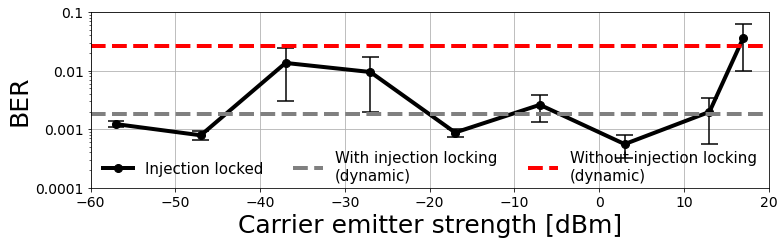

In [35]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 3.5
fig, ax1 = plt.subplots(1)

carrier = [-57, -47, -37, -27, -17, -7, 3, 13, 17]
df_BER = BER.iloc[:, 1:]
df_RSS = RSS.iloc[:, 1:]

ax1.plot(carrier, df_BER.mean(), color='black', marker='o', markersize=8, linewidth=4, label='Injection locked')
ax1.set_xlabel('Carrier emitter strength [dBm]', fontsize=25)
ax1.set_ylabel('BER', fontsize=25)
ax1.tick_params(labelsize=14)

# ax2=ax1.twinx()
# ax2.plot(carrier, df_RSS.mean(), color='#77A136', marker='o', markersize=8, linewidth=4, linestyle='--', label='RSS')
# ax2.set_ylabel('RSS [dBm]', fontsize=15, color='#77A136')
# ax2.tick_params(labelsize=14)
# ax2.set_ylim([-110,-70])

# error bar
width=1
mean = df_BER.mean()
std = df_BER.std()
for i in range(len(carrier)):
    d=carrier[i]
    m=mean[i]; s=std[i]/2
    ax1.vlines(d, (m-s), (m+s), color='black')
    ax1.hlines((m-s), d-width, d+width, color='black')
    ax1.hlines((m+s), d-width, d+width, color='black')
    
ax1.hlines(0.001804, -70, 27, color='grey', linewidth=4, linestyle='--', label="With injection locking\n(dynamic)")
ax1.hlines(0.026370, -70, 27, color='red', linewidth=4, linestyle='--', label="Without injection locking\n(dynamic)")
    
# mean = df_RSS.mean()
# std = df_RSS.std()
# for i in range(len(carrier)):
#     d=carrier[i]
#     m=mean[i]; s=std[i]/2
#     ax2.vlines(d, (m-s), (m+s), color='#77A136')
#     ax2.hlines((m-s), d-width, d+width, color='#77A136')
#     ax2.hlines((m+s), d-width, d+width, color='#77A136')
    
# tmp = ["Free running \n Static", "Free running \n Dynamic", "Injection locking \n Dynamic"]
# ax1.set_xticklabels(tmp)
# ax1.set_xticks(range(-37,12,10))

ax1.set_yscale('log')
tmp = [-5, -4, -3, -2, -1, 0]
tmp = ['{:f}'.format(10**i).rstrip('0').rstrip('.') for i in tmp]
ax1.set_yticklabels(tmp)
ax1.set_ylim([1e-4,1e-1])
ax1.set_xlim([-60, 20])

ax1.grid()
ax1.legend(loc="lower center", fontsize=15, framealpha=0.3, ncol=3, bbox_to_anchor=(0.5, -0.05), frameon=False)
plt.tight_layout()
plt.savefig('./bi_challenge.pdf')

In [93]:
RSS

,Free Running,Tx Gain 10,Tx Gain 20,Tx Gain 30,Tx Gain 40,Tx Gain 50,Tx Gain 60,Tx Gain 70,Tx Gain 80,Tx Gain 90
0,-94.6875,-99.7575,-100.2535,-105.7540,-100.7120,-98.9800,-99.3755,-100.0060,-104.6060,-103.414
1,-95.4075,-95.5090,-96.8355,-98.3995,-99.2620,-101.8150,-102.9985,-101.5915,-96.7355,-103.318
2,-99.5880,-94.9845,-100.4480,-101.4730,-106.1505,-100.5645,-103.3170,-103.4305,-102.8845,-101.350


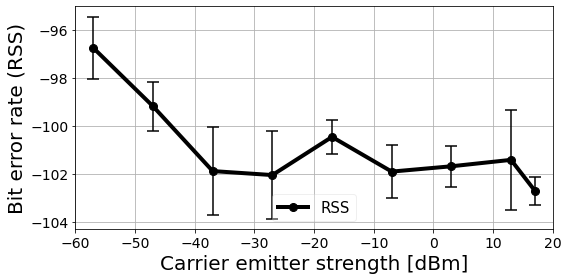

In [96]:
from pylab import rcParams
rcParams['figure.figsize'] = 8, 4
fig, ax1 = plt.subplots(1)

carrier = [-57, -47, -37, -27, -17, -7, 3, 13, 17]
df_RSS = RSS.iloc[:, 1:]

ax1.plot(carrier, df_RSS.mean(), color='black', marker='o', markersize=8, linewidth=4, label='RSS')
ax1.set_xlabel('Carrier emitter strength [dBm]', fontsize=20)
ax1.set_ylabel('Bit error rate (RSS)', fontsize=20)
ax1.tick_params(labelsize=14)

# ax2=ax1.twinx()
# ax2.plot(carrier, df_RSS.mean(), color='#77A136', marker='o', markersize=8, linewidth=4, linestyle='--', label='RSS')
# ax2.set_ylabel('RSS [dBm]', fontsize=15, color='#77A136')
# ax2.tick_params(labelsize=14)
# ax2.set_ylim([-110,-70])

# error bar
width=1
mean = df_RSS.mean()
std = df_RSS.std()
for i in range(len(carrier)):
    d=carrier[i]
    m=mean[i]; s=std[i]/2
    ax1.vlines(d, (m-s), (m+s))
    ax1.hlines((m-s), d-width, d+width)
    ax1.hlines((m+s), d-width, d+width)
    
# ax1.hlines(0.001804, -70, 27, color='grey', linewidth=4, linestyle='--', label='unaided static')
# ax1.hlines(0.026370, -70, 27, color='red', linewidth=4, linestyle='--', label='unaided dynamic')
    
# mean = df_RSS.mean()
# std = df_RSS.std()
# for i in range(len(carrier)):
#     d=carrier[i]
#     m=mean[i]; s=std[i]/2
#     ax2.vlines(d, (m-s), (m+s), color='#77A136')
#     ax2.hlines((m-s), d-width, d+width, color='#77A136')
#     ax2.hlines((m+s), d-width, d+width, color='#77A136')
    
# tmp = ["Free running \n Static", "Free running \n Dynamic", "Injection locking \n Dynamic"]
# ax1.set_xticklabels(tmp)
# ax1.set_xticks(range(-37,12,10))

# ax1.set_yscale('log')
# tmp = [-5, -4, -3, -2, -1, 0]
# tmp = ['{:f}'.format(10**i).rstrip('0').rstrip('.') for i in tmp]
# ax1.set_yticklabels(tmp)
# ax1.set_ylim([1e-4,1e-1])
ax1.set_xlim([-60, 20])

ax1.grid()
ax1.legend(loc="lower center", fontsize=15, framealpha=0.3)
plt.tight_layout()
# plt.savefig('./bi_challenge.pdf')

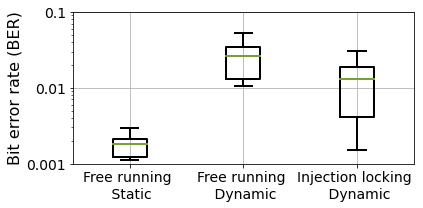

In [68]:
from pylab import rcParams
rcParams['figure.figsize'] = 6, 3
fig, ax1 = plt.subplots(1)

# xlabel = ["Free running \n Static", "Free running \n Dynamic", "Injection locking \n Static", "Injection locking \n Dynamic"]
# ax1.bar(xlabel, df_BER.mean(), color='black', width=0.2)
boxprops = dict(linewidth=2.0, color='black')
whiskerprops = dict(linestyle='-', linewidth=2.0, color='black')
capprops = dict(linestyle='-', linewidth=2.0, color='black')
meanprops = dict(linestyle='-', linewidth=2.0, color='#77A136')
medianprops = dict(linestyle='-', linewidth=0, color='white')
ax1.boxplot(BER_D.T, widths=0.3, meanline=True, showmeans=True, boxprops=boxprops,
            whiskerprops=whiskerprops, capprops=capprops, meanprops=meanprops, medianprops=medianprops)

ax1.set_yscale('log')
tmp = [-4, -3, -2, -1]
tmp = ['{:f}'.format(10**i).rstrip('0').rstrip('.') for i in tmp]
ax1.set_yticklabels(tmp)
ax1.set_ylim([1e-3,1e-1])
ax1.set_xticklabels(["Free running \n Static", "Free running \n Dynamic", "Injection locking \n Dynamic"])
ax1.tick_params(labelsize=13)

ax1.grid()
ax1.set_ylabel("Bit error rate (BER)", fontsize=16)

ax1.tick_params(labelsize=14)

# plt.savefig('./reliability.pdf')